# AGENDA

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition.  or not based on their attributes like

Demographics (city, age, gender etc.)You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

## Problem statement
You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company

In [ ]:
!pip install category_encoders
import category_encoders

In [ ]:
import pandas as pd
import numpy as np
import seaborn  as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report



In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/datasets/ola_driver_scaler.csv")
#pd.set_option('display.max_rows', None)
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [ ]:
pd.reset_option("display.max_rows")

pd.reset_option("display.max_columns")

In [ ]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df.shape

(19104, 14)

In [ ]:
df.nunique()

Unnamed: 0              19104
MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [ ]:
(df.isna().sum()/df.shape[0])*100

Unnamed: 0               0.000000
MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [ ]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [ ]:
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3
19100,19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3
19101,19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2
19102,19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            19104 non-null  int64         
 1   MMM-YY                19104 non-null  datetime64[ns]
 2   Driver_ID             19104 non-null  int64         
 3   Age                   19043 non-null  float64       
 4   Gender                19052 non-null  float64       
 5   City                  19104 non-null  object        
 6   Education_Level       19104 non-null  int64         
 7   Income                19104 non-null  int64         
 8   Dateofjoining         19104 non-null  datetime64[ns]
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  Joining Designation   19104 non-null  int64         
 11  Grade                 19104 non-null  int64         
 12  Total Business Value  19104 non-null  int64         
 13  Quarterly Rating

In [ ]:
df = df.drop("Unnamed: 0", axis='columns')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [ ]:
df[df["Age"].isnull()]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
72,2020-02-01,20,NaN,1.0,C19,0,40342,2019-10-25,NaT,3,3,0,1
97,2019-10-01,22,NaN,0.0,C10,2,31224,2018-05-25,NaT,1,1,200000,3
110,2019-07-01,24,NaN,0.0,C24,2,76308,2018-05-25,NaT,1,2,203240,3
212,2019-11-01,40,NaN,0.0,C15,0,59182,2019-11-08,NaT,2,2,0,1
261,2019-05-01,49,NaN,0.0,C20,0,53039,2018-05-25,NaT,1,2,124190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,2020-05-01,2690,NaN,0.0,C11,2,77662,2018-07-17,NaT,1,2,692600,4
18722,2020-08-01,2730,NaN,1.0,C16,2,69924,2019-07-08,NaT,2,2,161860,2
18780,2019-03-01,2738,NaN,0.0,C17,0,23068,2018-09-08,NaT,1,1,639780,3
18843,2019-01-01,2751,NaN,0.0,C17,2,53115,2015-11-05,NaT,1,1,506550,3


In [ ]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [ ]:
temp=df.groupby("Driver_ID")["Driver_ID"].count()


In [ ]:
print(temp.head(50))

Driver_ID
1      3
2      2
4      5
5      3
6      5
8      3
11     1
12     6
13    23
14     3
16     2
17     7
18     5
20     6
21    14
22    16
24    10
25    24
26    24
29     5
30     3
31     6
34     4
35     3
36    14
37     6
38     4
39     5
40     4
41    18
42     5
43     2
44     3
45     7
46     3
47     3
49    13
50     2
51    10
52     6
54    18
55     5
56    24
57    19
58     1
59     3
60    24
61     3
62     1
63    24
Name: Driver_ID, dtype: int64


In [ ]:
df['Income_Increased'] = np.where(df['Income']>df.groupby(by = ["Driver_ID","Dateofjoining"])['Income'].shift().to_frame()["Income"],1,0)

In [ ]:
df['Income_Increased'].value_counts()

0    19060
1       44
Name: Income_Increased, dtype: int64

In [ ]:
df['Qhour_Increased'] = np.where(df['Quarterly Rating']>df.groupby(by = ["Driver_ID","Dateofjoining"])['Quarterly Rating'].shift().to_frame()["Quarterly Rating"],1,0)

In [ ]:
df['Qhour_Increased'].value_counts()

0    17859
1     1245
Name: Qhour_Increased, dtype: int64

In [ ]:
df['churn'] = np.where(np.isnat(df['LastWorkingDate']),0,1)

In [ ]:
df['churn'].value_counts()

0    17488
1     1616
Name: churn, dtype: int64

In [ ]:
df1 = df.groupby(by = "Driver_ID").agg({"MMM-YY" : "nunique",
                                                     "Age" : "first",
                                                     "Gender" : "first",
                                                     "City" : "first",
                                                     "Education_Level" : "first",
                                                     "Income" : "mean",
                                                     "Dateofjoining" : "first",
                                                     "Joining Designation" : "first",
                                                     "Total Business Value" : "sum",
                                                     "Quarterly Rating" : "mean",
                                                     "Grade" : "mean",
                                                     "Income_Increased" : "max",
                                                     "Qhour_Increased" : "max",
                                                     "churn" : "max"})

In [ ]:
df1.reset_index(inplace=True)

In [ ]:
df1

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Total Business Value,Quarterly Rating,Grade,Income_Increased,Qhour_Increased,churn
0,1,3,28.0,0.0,C23,2,57387.0,2018-12-24,1,1715580,2.000000,1.0,0,0,1
1,2,2,31.0,0.0,C7,2,67016.0,2020-11-06,2,0,1.000000,2.0,0,0,0
2,4,5,43.0,0.0,C13,2,65603.0,2019-12-07,2,350000,1.000000,2.0,0,0,1
3,5,3,29.0,0.0,C9,0,46368.0,2019-01-09,1,120360,1.000000,1.0,0,0,1
4,6,5,31.0,1.0,C11,1,78728.0,2020-07-31,3,1265000,1.600000,3.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,24,33.0,0.0,C24,0,82815.0,2015-10-15,2,21748820,2.625000,3.0,0,1,0
2377,2785,3,34.0,1.0,C9,0,12105.0,2020-08-28,1,0,1.000000,1.0,0,0,1
2378,2786,9,44.0,0.0,C19,0,35370.0,2018-07-31,2,2815090,1.666667,2.0,0,0,1
2379,2787,6,28.0,1.0,C20,2,69498.0,2018-07-21,1,977830,1.500000,1.0,0,0,1


In [ ]:
(df1.isna().sum()/df1.shape[0])*100

Driver_ID               0.0
MMM-YY                  0.0
Age                     0.0
Gender                  0.0
City                    0.0
Education_Level         0.0
Income                  0.0
Dateofjoining           0.0
Joining Designation     0.0
Total Business Value    0.0
Quarterly Rating        0.0
Grade                   0.0
Income_Increased        0.0
Qhour_Increased         0.0
churn                   0.0
dtype: float64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   MMM-YY                2381 non-null   int64         
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   int64         
 6   Income                2381 non-null   float64       
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   Joining Designation   2381 non-null   int64         
 9   Total Business Value  2381 non-null   int64         
 10  Quarterly Rating      2381 non-null   float64       
 11  Grade                 2381 non-null   float64       
 12  Income_Increased      2381 non-null   int64         
 13  Qhour_Increased   

In [ ]:
df1["Gender"].value_counts()


0.0    1404
1.0     977
Name: Gender, dtype: int64

In [ ]:
df1["churn"].value_counts()


1    1616
0     765
Name: churn, dtype: int64

In [ ]:
df1["City"].value_counts()

C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: City, dtype: int64

KNN IMPUTATION


In [ ]:
imputer = KNNImputer(n_neighbors=2)

In [ ]:
temp = pd.DataFrame(imputer.fit_transform(df[["Age","Gender","Income","Grade","Quarterly Rating"]]),columns = ["Age","Gender","Income","Grade","Quarterly Rating"])

In [ ]:
temp

,Age,Gender,Income,Grade,Quarterly Rating
0,28.0,0.0,57387.0,1.0,2.0
1,28.0,0.0,57387.0,1.0,2.0
2,28.0,0.0,57387.0,1.0,2.0
3,31.0,0.0,67016.0,2.0,1.0
4,31.0,0.0,67016.0,2.0,1.0
...,...,...,...,...,...
19099,30.0,0.0,70254.0,2.0,3.0
19100,30.0,0.0,70254.0,2.0,3.0
19101,30.0,0.0,70254.0,2.0,2.0
19102,30.0,0.0,70254.0,2.0,2.0


In [ ]:
(df.isna().sum()/df.shape[0])*100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
Income_Increased         0.000000
Qhour_Increased          0.000000
churn                    0.000000
dtype: float64

In [ ]:
(temp.isna().sum()/temp.shape[0])*100

Age                 0.0
Gender              0.0
Income              0.0
Grade               0.0
Quarterly Rating    0.0
dtype: float64

In [ ]:
df1.nunique()

Driver_ID               2381
MMM-YY                    24
Age                       35
Gender                     2
City                      29
Education_Level            3
Income                  2339
Dateofjoining            869
Joining Designation        5
Total Business Value    1629
Quarterly Rating         163
Grade                     28
Income_Increased           2
Qhour_Increased            2
churn                      2
dtype: int64

# Insights
1.	there is no target variable given to us, So we make the target column manually based on last_working_date
2.	there we missing values that we handled
3.	We aggregated the data to new dataset from 19 K rows to 2300 rows.
4.	3 new cols were made  Income_incresed ,Qhour_incresed  and target variable (churn)
5.	There are almost 60 % male and 40 % female
6.	Almost 70%  people  churn
7.	C20 is the most Frequent city


[Text(0, 3, '765'), Text(0, 3, '1616')]

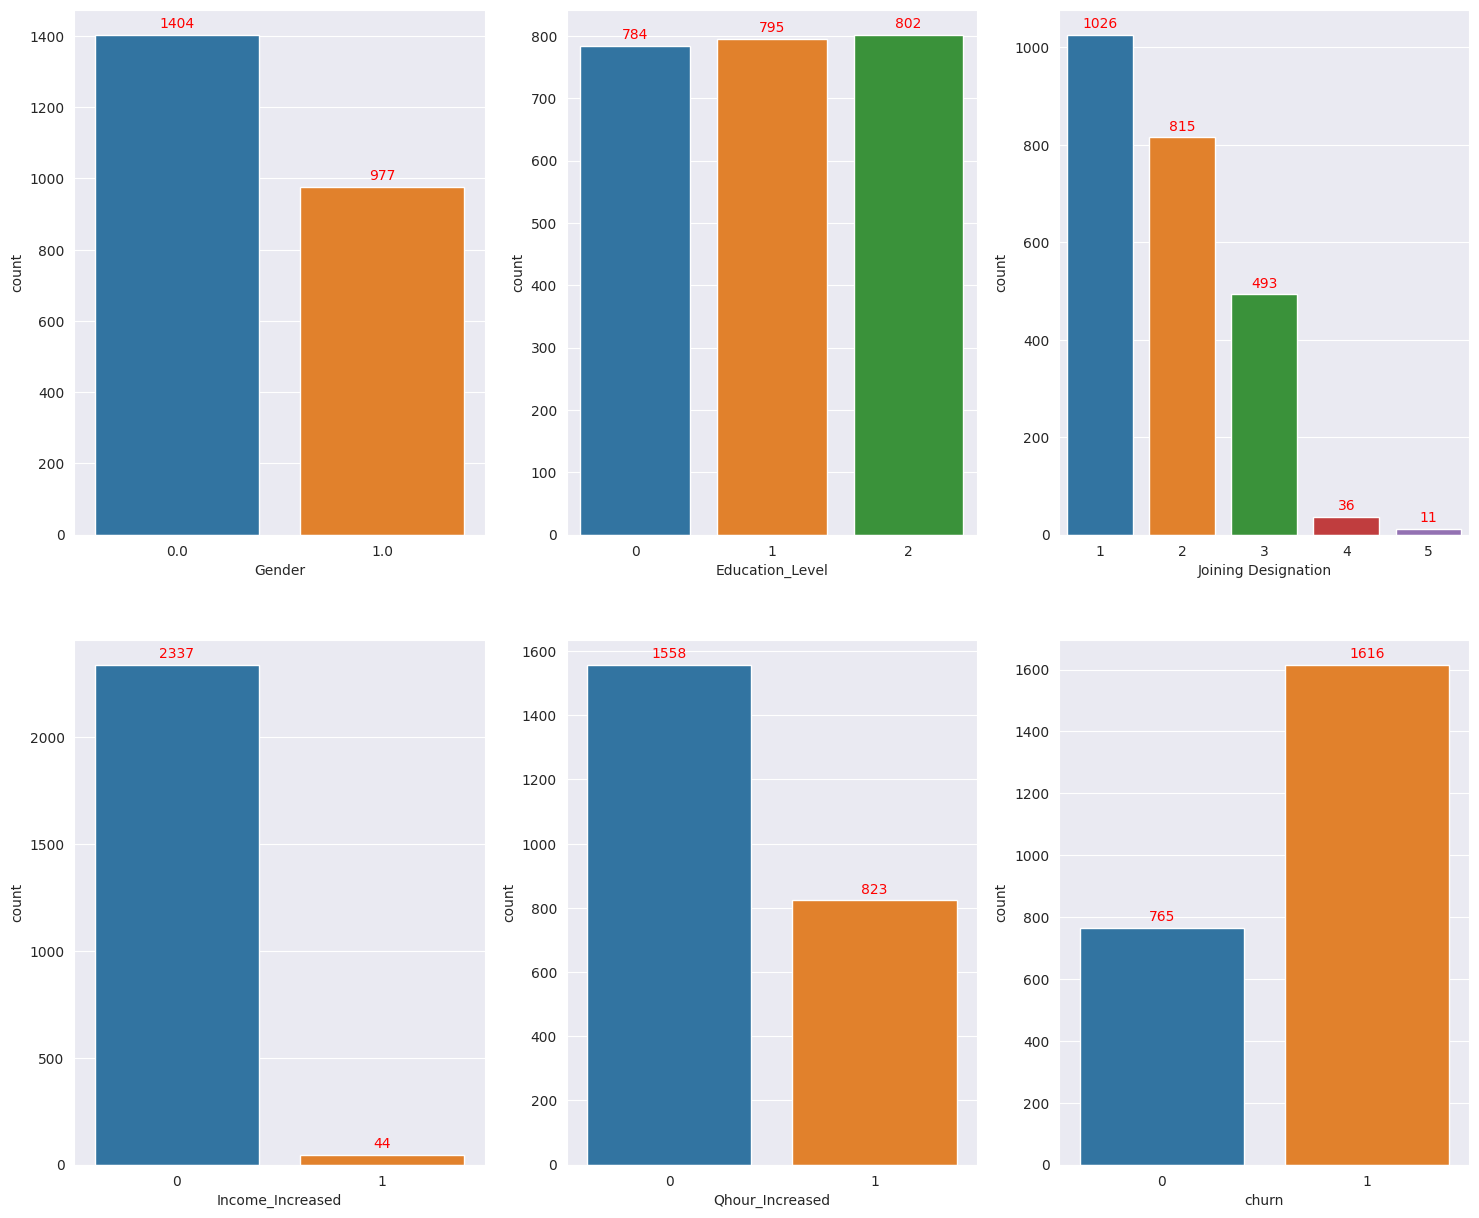

In [ ]:
fig=plt.figure(figsize=(18,15))

plt.subplot(2,3,1)
ax=sns.countplot(x="Gender",data = df1)
ax.bar_label(ax.containers[0], label_type='edge', color='red', fontsize=10, padding=3)


plt.subplot(2,3,2)
ax=sns.countplot(x="Education_Level",data = df1)
ax.bar_label(ax.containers[0], label_type='edge', color='red', fontsize=10, padding=3)

plt.subplot(2,3,3)
ax=sns.countplot(x="Joining Designation",data = df1)
ax.bar_label(ax.containers[0], label_type='edge', color='red', fontsize=10, padding=3)

plt.subplot(2,3,4)
ax=sns.countplot(x="Income_Increased",data = df1)
ax.bar_label(ax.containers[0], label_type='edge', color='red', fontsize=10, padding=3)

plt.subplot(2,3,5)
ax=sns.countplot(x="Qhour_Increased",data = df1)
ax.bar_label(ax.containers[0], label_type='edge', color='red', fontsize=10, padding=3)

plt.subplot(2,3,6)
ax=sns.countplot(x="churn",data = df1)
ax.bar_label(ax.containers[0], label_type='edge', color='red', fontsize=10, padding=3)

Text(0.5, 1.0, 'Top 5 Grade of drivers ')

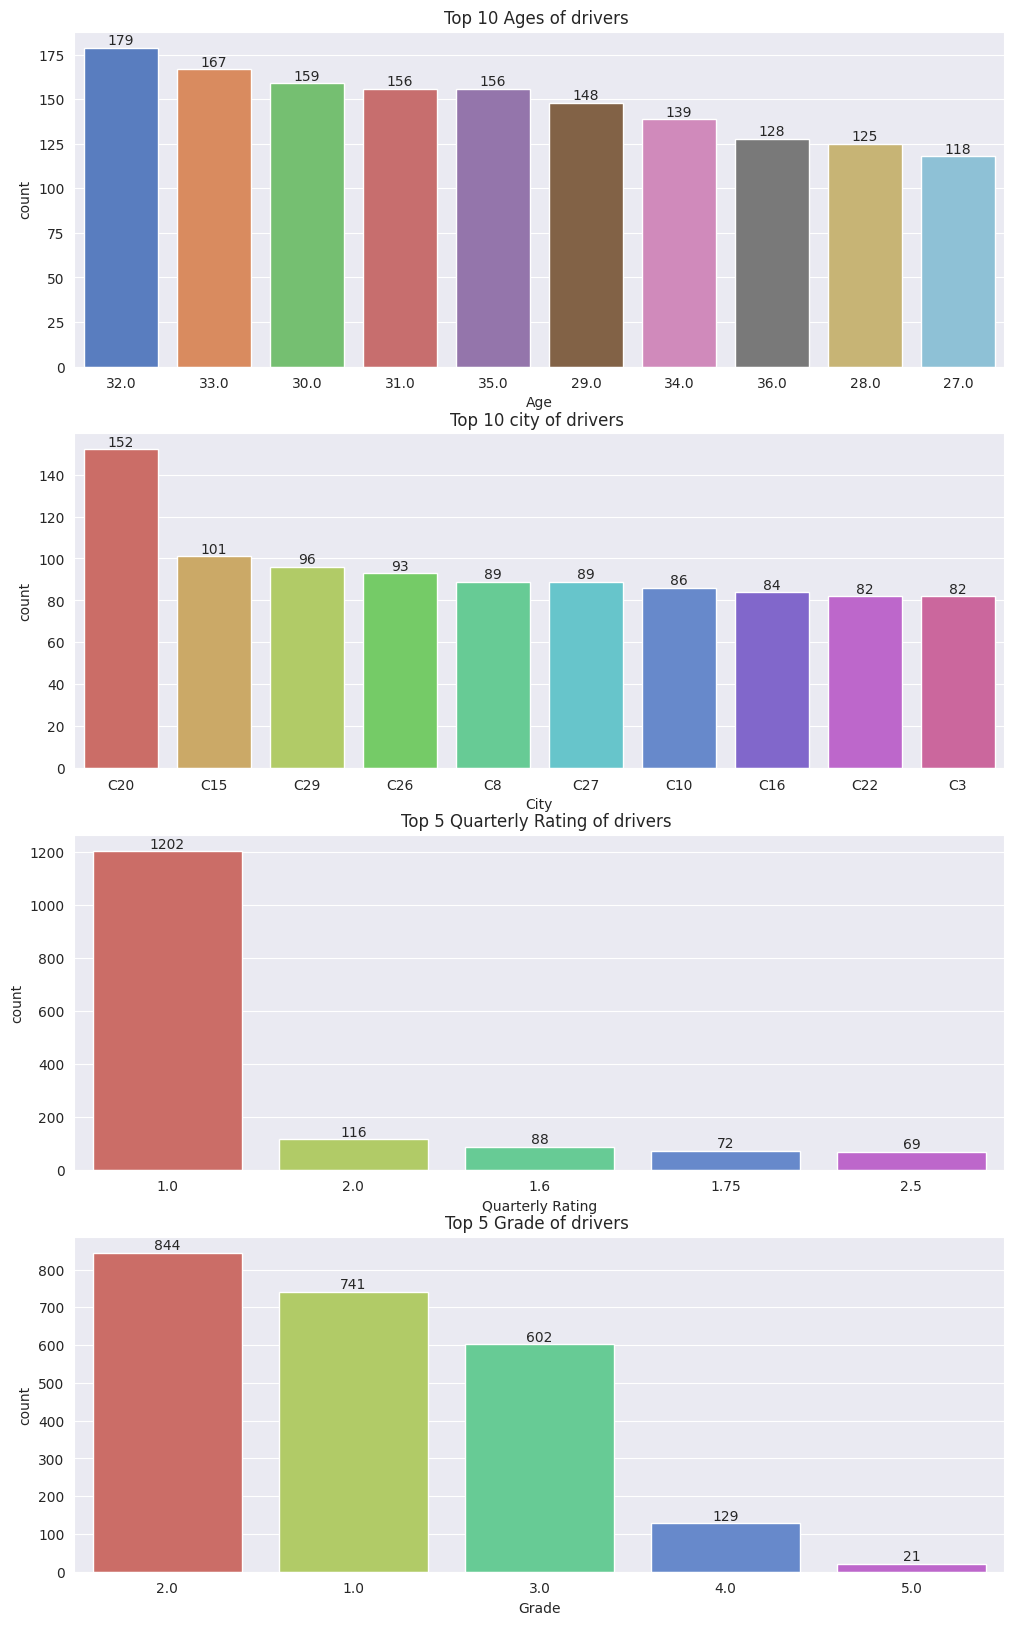

In [ ]:
plt.figure(figsize =(12,20))
sns.set_style("darkgrid")

plt.subplot(4,1,1)
ax=sns.countplot(x="Age", order = df1["Age"].value_counts().index[0:10],data = df1,palette="muted")
for label in ax.containers:
    ax.bar_label(label)

plt.title("Top 10 Ages of drivers ")

plt.subplot(4,1,2)
ax=sns.countplot(x="City", order = df1["City"].value_counts().index[0:10],data = df1,palette="hls")
for label in ax.containers:
    ax.bar_label(label)
plt.title("Top 10 city of drivers ")

plt.subplot(4,1,3)
ax=sns.countplot(x="Quarterly Rating", order = df1["Quarterly Rating"].value_counts().index[0:5],data = df1,palette="hls")
for label in ax.containers:
    ax.bar_label(label)
plt.title("Top 5 Quarterly Rating of drivers ")

plt.subplot(4,1,4)
ax=sns.countplot(x="Grade", order = df1["Grade"].value_counts().index[0:5],data = df1,palette="hls")
for label in ax.containers:
    ax.bar_label(label)
plt.title("Top 5 Grade of drivers ")

** MULTIVARIATE **

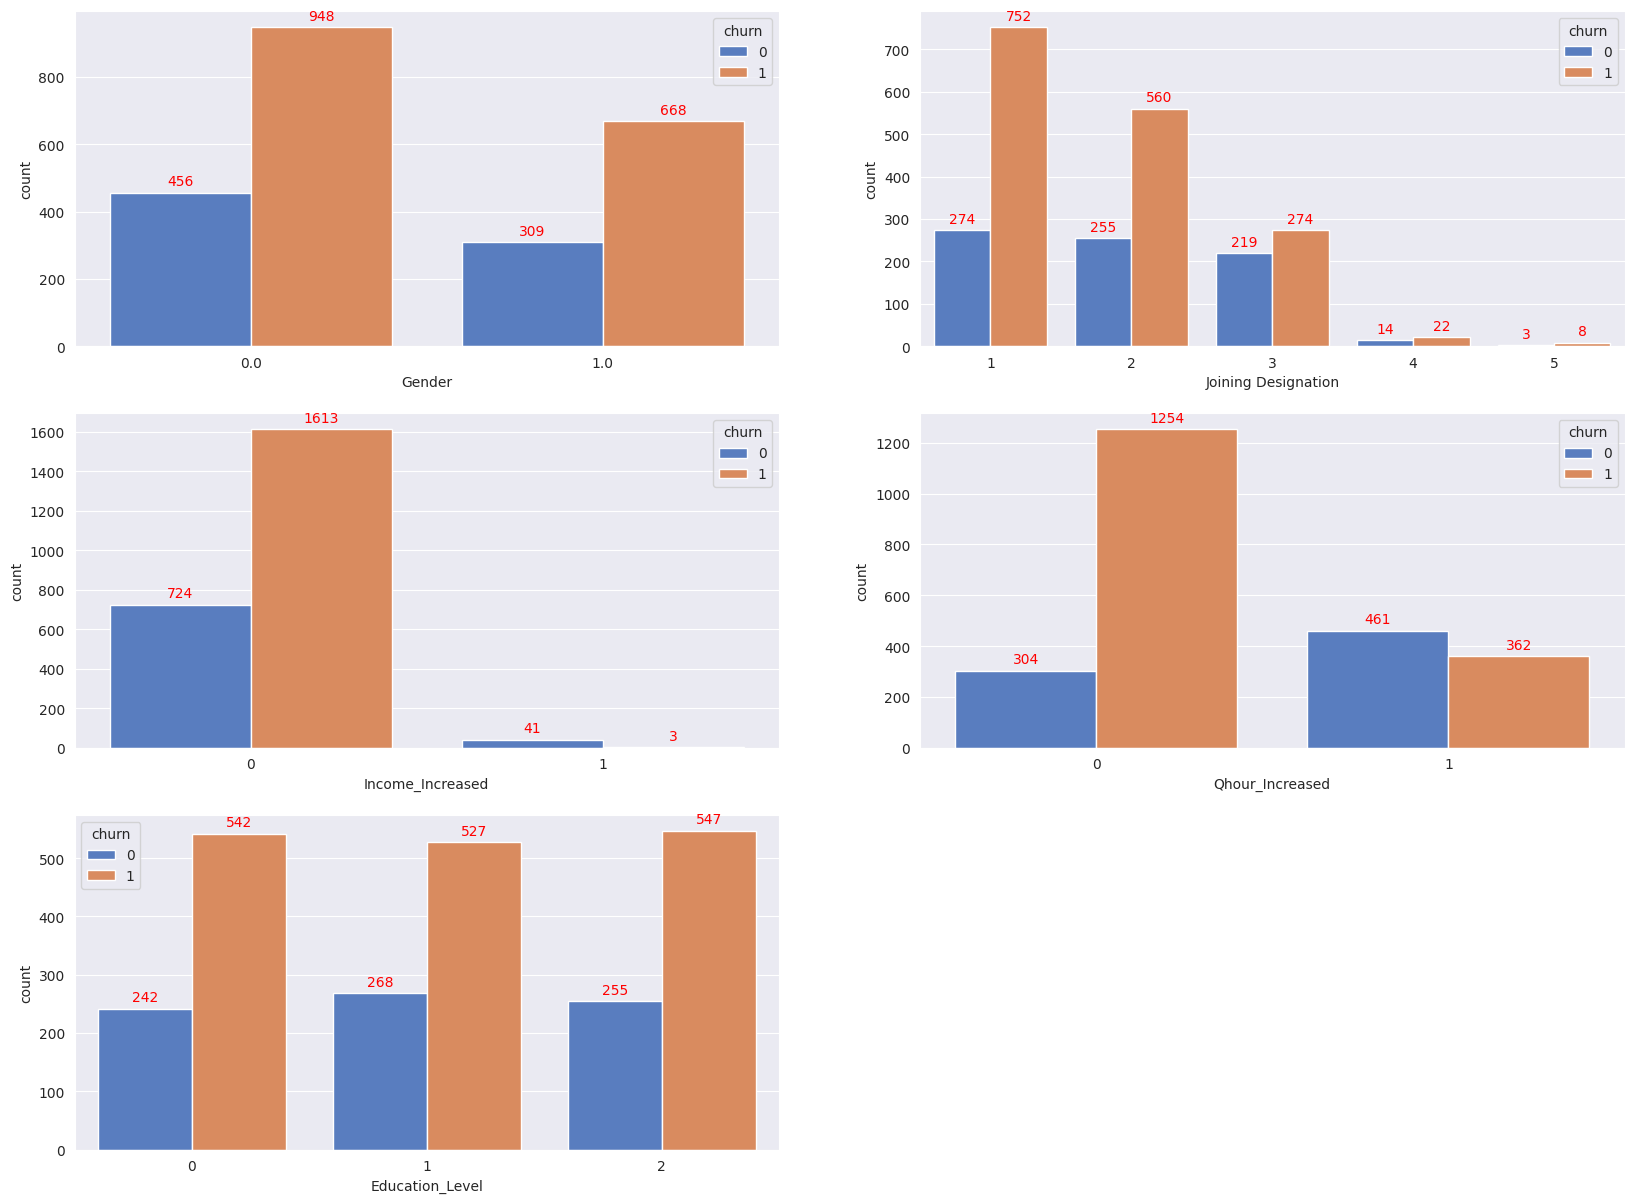

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
ax=sns.countplot(x='Gender',data=df1,hue='churn',palette="muted")
for label in ax.containers:
    ax.bar_label(label,label_type='edge', color='red', fontsize=10, padding=3)


plt.subplot(4,2,2)
ax=sns.countplot(x='Joining Designation',data=df1,hue='churn',palette="muted")
for label in ax.containers:
    ax.bar_label(label,label_type='edge', color='red', fontsize=10, padding=3)


plt.subplot(4,2,3)
ax=sns.countplot(x='Income_Increased',data=df1,hue='churn',palette="muted")
for label in ax.containers:
    ax.bar_label(label,label_type='edge', color='red', fontsize=10, padding=3)


plt.subplot(4,2,4)
ax=sns.countplot(x='Qhour_Increased', data=df1, hue='churn',palette="muted")
for label in ax.containers:
    ax.bar_label(label,label_type='edge', color='red', fontsize=10, padding=3)


plt.subplot(4,2,5)
ax=sns.countplot(x='Education_Level', data=df1, hue='churn',palette="muted")
for label in ax.containers:
    ax.bar_label(label,label_type='edge', color='red', fontsize=10, padding=3)


In [ ]:
df1.nunique()

Driver_ID               2381
MMM-YY                    24
Age                       35
Gender                     2
City                      29
Education_Level            3
Income                  2339
Dateofjoining            869
Joining Designation        5
Total Business Value    1629
Quarterly Rating         163
Grade                     28
Income_Increased           2
Qhour_Increased            2
churn                      2
dtype: int64

<Axes: xlabel='churn', ylabel='Income'>

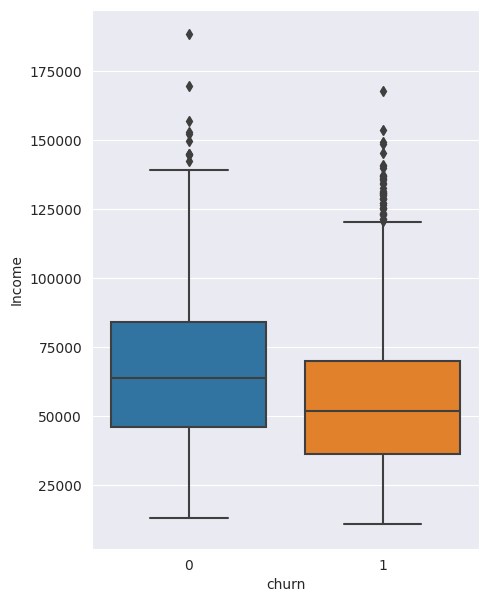

In [ ]:
plt.figure(figsize=(5,7))
sns.boxplot(y=df1["Income"],x=df1["churn"])

<Axes: xlabel='churn', ylabel='Total Business Value'>

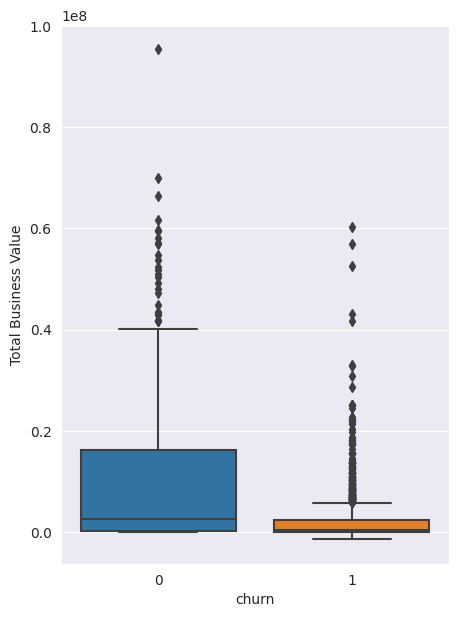

In [ ]:
plt.figure(figsize=(5,7))
sns.boxplot(y=df1["Total Business Value"],x=df1["churn"])

# Insights

1.	Joining designation 1 is the most frequent
2.	People belonging to different education level 0,1,2 are equal
3.	There are almost 98 % people who’s income is not increased
4.	Top 17-32 is the age range where there most number of people
5.	 C20 is the most frequent city
6.	1 is the most frequent quarterly rating
7.	2 is the most frequent grade
8.	 Male and female both have more probability to churn
9.	Joining designation 1 and 2 people are more likely to churn
10.	People who’s income is not increased are most likely to churn
11.	People who do not churn have median income close to 65k
12.	People who churn have median income close to 52k
13.	People who churn  have  almost 0 Total business value
14. Quatarly rating and total bussiness value are higly correlated 0.9


<ipython-input-120-527bbf6e124a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(method='spearman'), annot=True,cmap="BrBG_r")


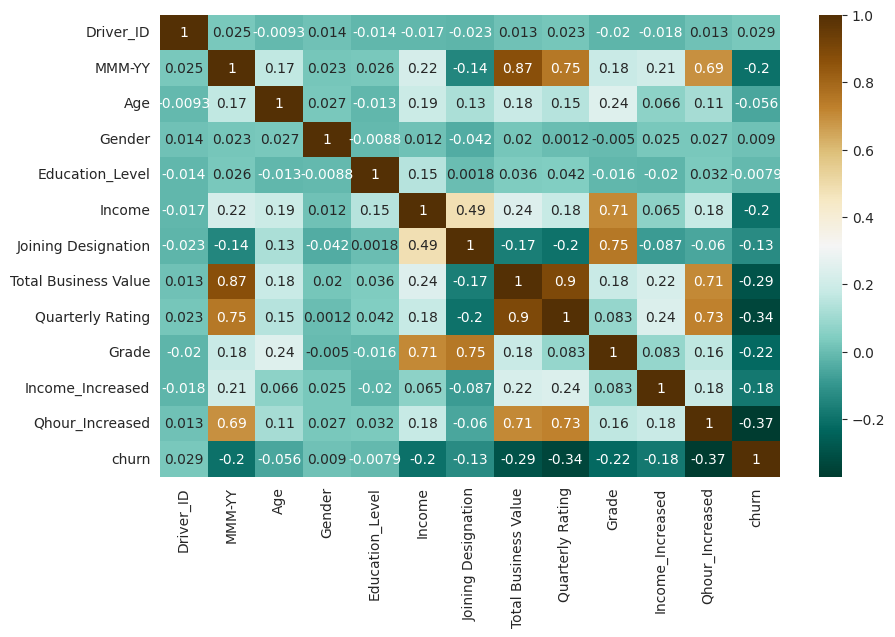

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(method='spearman'), annot=True,cmap="BrBG_r")
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   MMM-YY                2381 non-null   int64         
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   int64         
 6   Income                2381 non-null   float64       
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   Joining Designation   2381 non-null   int64         
 9   Total Business Value  2381 non-null   int64         
 10  Quarterly Rating      2381 non-null   float64       
 11  Grade                 2381 non-null   float64       
 12  Income_Increased      2381 non-null   int64         
 13  Qhour_Increased   

In [ ]:
  target = TargetEncoder()

  df1["City"] = target.fit_transform(df1["City"],df1["churn"])

In [ ]:
df1["Dateofjoining"]=df1["Dateofjoining"].dt.year

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Driver_ID             2381 non-null   int64  
 1   MMM-YY                2381 non-null   int64  
 2   Age                   2381 non-null   float64
 3   Gender                2381 non-null   float64
 4   City                  2381 non-null   float64
 5   Education_Level       2381 non-null   int64  
 6   Income                2381 non-null   float64
 7   Dateofjoining         2381 non-null   int64  
 8   Joining Designation   2381 non-null   int64  
 9   Total Business Value  2381 non-null   int64  
 10  Quarterly Rating      2381 non-null   float64
 11  Grade                 2381 non-null   float64
 12  Income_Increased      2381 non-null   int64  
 13  Qhour_Increased       2381 non-null   int64  
 14  churn                 2381 non-null   int64  
dtypes: float64(6), int64(

In [ ]:
# Data Preparation for Modelling
X=df1.drop('churn',axis=1)
y=df1['churn']

In [ ]:
# Splitting into train and test data
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)

In [ ]:
#scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False)

In [ ]:
rf_clf.score(X_train,y_train),rf_clf.score(X_test,y_test)

(1.0, 0.8769230769230769)

In [ ]:
y_test_pred = rf_clf.predict(X_test)
y_train_pred = rf_clf.predict(X_train)

In [ ]:
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,535.0,1131.0,1.0,1666.0,1666.0


In [ ]:
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.838095,0.893069,0.876923,0.865582,0.875385
recall,0.765217,0.929897,0.876923,0.847557,0.876923
f1-score,0.800000,0.911111,0.876923,0.855556,0.875369
support,230.000000,485.000000,0.876923,715.000000,715.000000


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=  DecisionTreeClassifier(max_depth=5,class_weight="balanced"),n_estimators=100)
bag_clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=5),
                  n_estimators=100)

In [ ]:
y_test_pred = bag_clf.predict(X_test)
y_train_pred = bag_clf.predict(X_train)

In [ ]:
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.739195,0.960804,0.871549,0.850000,0.889639
recall,0.927103,0.845270,0.871549,0.886186,0.871549
f1-score,0.822554,0.899341,0.871549,0.860948,0.874683
support,535.000000,1131.000000,0.871549,1666.000000,1666.000000


In [ ]:
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
clf_report


,0,1,accuracy,macro avg,weighted avg
precision,0.778195,0.948775,0.885315,0.863485,0.893903
recall,0.900000,0.878351,0.885315,0.889175,0.885315
f1-score,0.834677,0.912206,0.885315,0.873441,0.887266
support,230.000000,485.000000,0.885315,715.000000,715.000000


In [ ]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1131, number of negative: 535
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 1666, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678872 -> initscore=0.748591
[LightGBM] [Info] Start training from score 0.748591


LGBMClassifier()

In [ ]:
y_test_pred = lgb_clf.predict(X_test)
y_train_pred = lgb_clf.predict(X_train)

In [ ]:
probs= lgb_clf.predict_proba(X_test)
probs

array([[0.00271163, 0.99728837],
       [0.97812805, 0.02187195],
       [0.85207282, 0.14792718],
       ...,
       [0.92612842, 0.07387158],
       [0.61381631, 0.38618369],
       [0.96279423, 0.03720577]])

<Axes: >

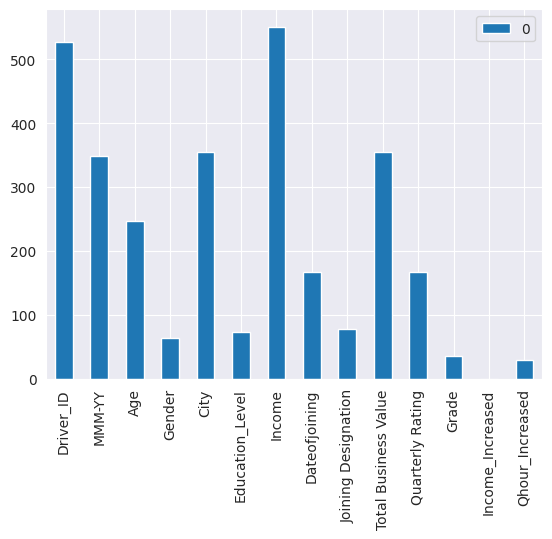

In [ ]:
pd.DataFrame(data=lgb_clf.feature_importances_,index=X.columns).plot(kind = "bar")


In [ ]:
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.998134,1.000000,0.9994,0.999067,0.999401
recall,1.000000,0.999116,0.9994,0.999558,0.999400
f1-score,0.999066,0.999558,0.9994,0.999312,0.999400
support,535.000000,1131.000000,0.9994,1666.000000,1666.000000


In [ ]:
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
clf_report


,0,1,accuracy,macro avg,weighted avg
precision,0.824074,0.895792,0.874126,0.859933,0.872722
recall,0.773913,0.921649,0.874126,0.847781,0.874126
f1-score,0.798206,0.908537,0.874126,0.853371,0.873046
support,230.000000,485.000000,0.874126,715.000000,715.000000


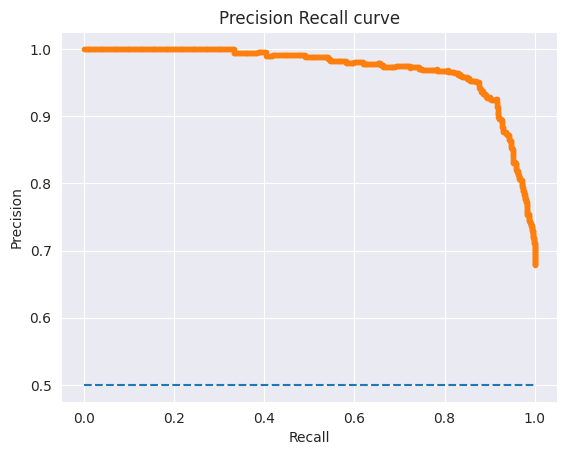

In [ ]:
def plot_pre_curve(y_test,probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs[:,1])
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    plt.title("Precision Recall curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.show()

plot_pre_curve(y_test , probs)

0.9395607350963694


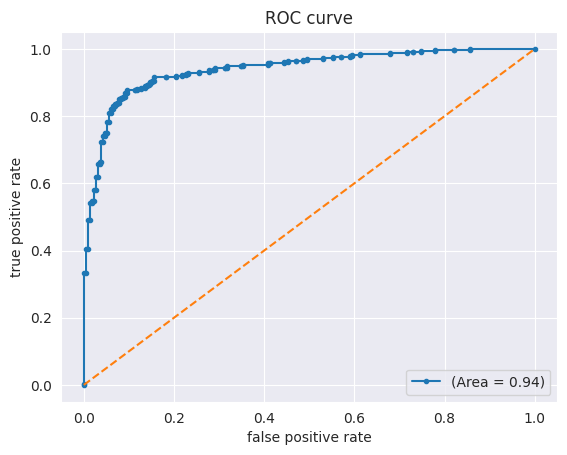

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

def plot_roc(y_test,prob):
    fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])
    roc_auc = roc_auc_score(y_test, probs[:,1])

    # plot no skill
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.',label='(Area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    print(roc_auc)
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    # show the plot
    plt.show()

plot_roc(y_test , probs)

#Insights

1.	Using Random Forest we get train and test score as (1.0, 0.876)
2.	Using Bagging Classifier we get train and test score as (0.87, 0.88)
3.	Using Boosting Classifier ( Light BGM )

  *   we get train and test score as (0.99, 0.87)
  *   ROC-AUC score test dataset: 0.94
  *   Till 0.5 recall and precision is not decreasing but after the 0.5 precision start decreasing slowly   and after recall is 0.85 the precision starts  decreasing rapidly.





# Recommendations

1. Driver main reason to churn is there Income is not increasing, So Coampany should  provide some offers or gifts or  bonuses to reatinf their drivers .

2. We should try to keep the recall higher as possible compare to precision ,So that we can correct no of people to churn .

3. Company can starts some camps or some monthly calls to driver to teach then how they can   how they can increase there Quatarly rating  since high Q rating can lead to high income .

4.  Company can have communication with low designation and low graded driver on how to increase their designation and grades
